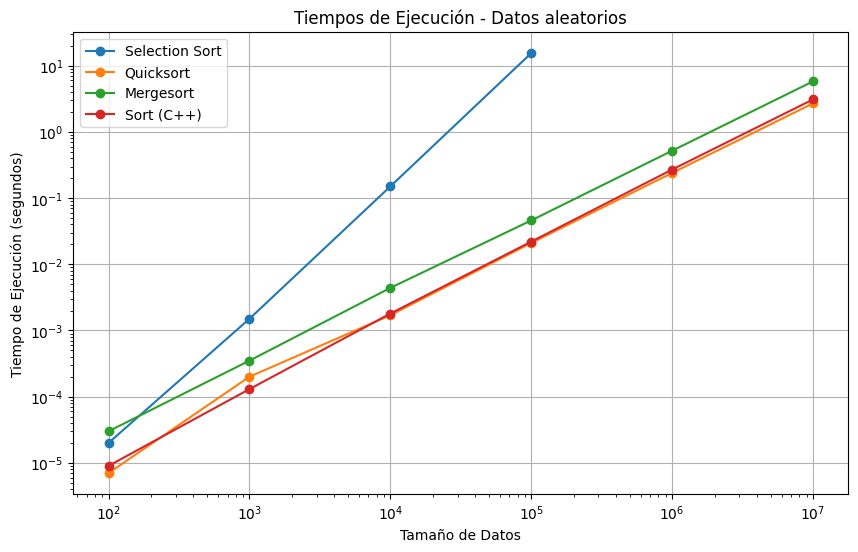

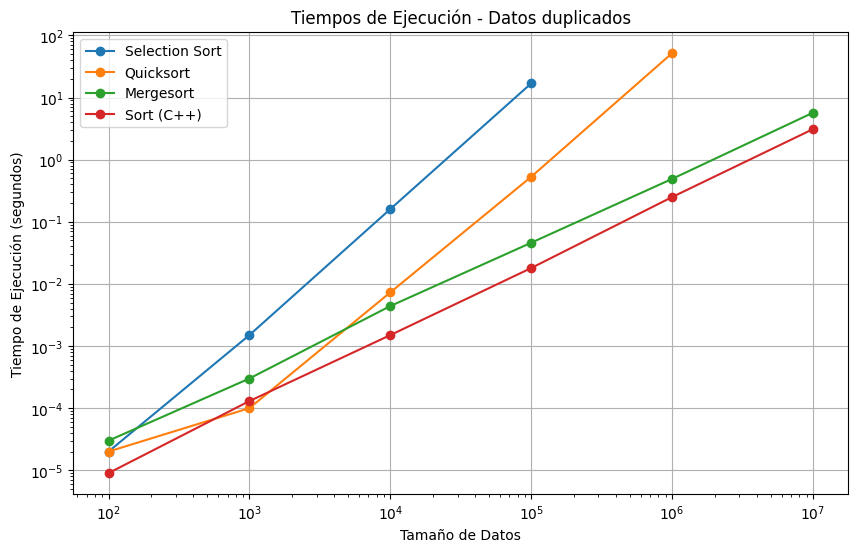

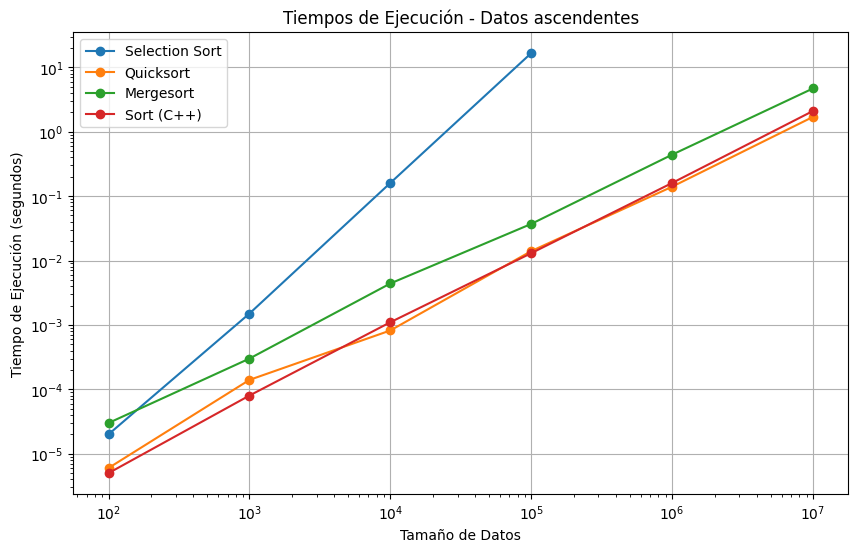

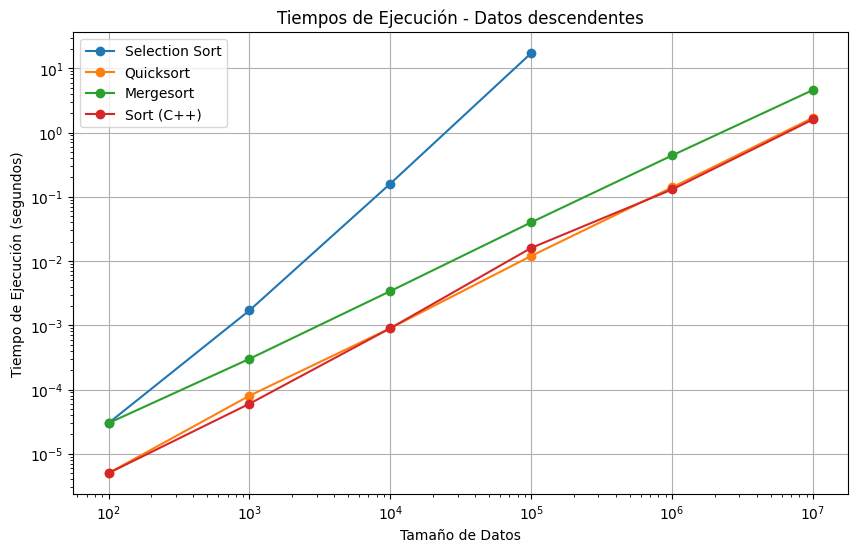

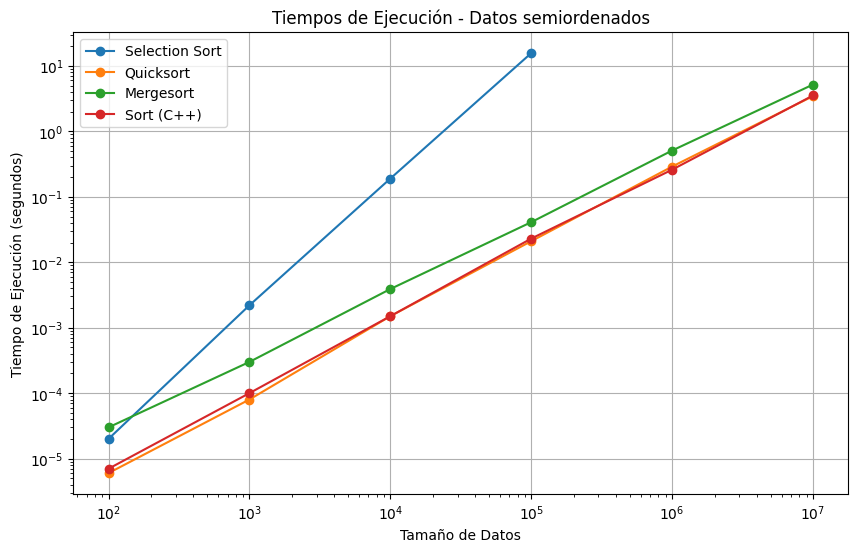

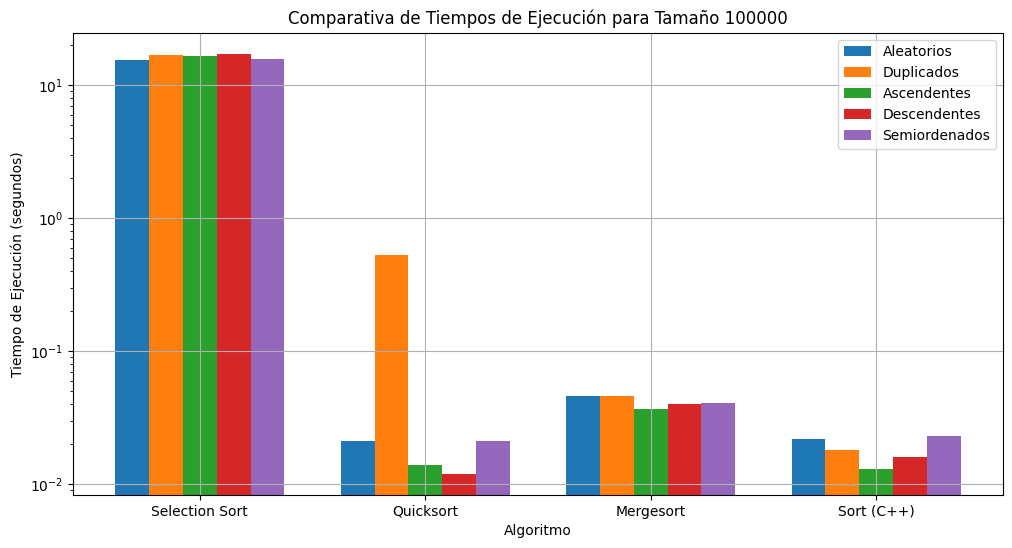

In [4]:
import matplotlib.pyplot as plt

# Datos de las tablas
tamaños = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
selection_sort = {
    "aleatorios": [0.00002, 0.0015, 0.15, 15.5, "DNF", "DNF"],
    "duplicados": [0.00002, 0.0015, 0.16, 16.9, "DNF", "DNF"],
    "ascendentes": [0.00002, 0.0015, 0.16, 16.6, "DNF", "DNF"],
    "descendentes": [0.00003, 0.0017, 0.16, 17.2, "DNF", "DNF"],
    "semiordenados": [0.00002, 0.0022, 0.19, 15.7, "DNF", "DNF"]

}

quicksort = {
    "aleatorios": [0.000007, 0.0002, 0.0017, 0.021, 0.24, 2.7],
    "duplicados": [0.00002, 0.0001, 0.0073, 0.53, 51.8, "DNF"],
    "ascendentes": [0.000006, 0.00014, 0.00082, 0.014, 0.14, 1.7],
    "descendentes": [0.000005, 0.00008, 0.0009, 0.012, 0.14, 1.7],
    "semiordenados": [0.000006, 0.00008, 0.0015, 0.021, 0.29, 3.46]
}

mergesort = {
    "aleatorios": [0.00003, 0.00035, 0.0044, 0.046, 0.52, 5.8],
    "duplicados": [0.00003, 0.0003, 0.0044, 0.046, 0.49, 5.7],
    "ascendentes": [0.00003, 0.0003, 0.0044, 0.037, 0.44, 4.7],
    "descendentes": [0.00003, 0.0003, 0.0034, 0.04, 0.44, 4.6],
    "semiordenados": [0.00003, 0.0003, 0.0039, 0.041, 0.51, 5.2]
}

sort_cpp = {
    "aleatorios": [0.000009, 0.00013, 0.0018, 0.022, 0.27, 3.1],
    "duplicados": [0.000009, 0.00013, 0.0015, 0.018, 0.25, 3.1],
    "ascendentes": [0.000005, 0.00008, 0.0011, 0.013, 0.16, 2.1],
    "descendentes": [0.000005, 0.00006, 0.0009, 0.016, 0.13, 1.6],
    "semiordenados": [0.000007, 0.0001, 0.0015, 0.023, 0.26, 3.54]
}


# Conversión de "DNF" a None para facilitar el graficado
def convert_to_float(data):
    return [float(x) if x != "DNF" else None for x in data]

for key in selection_sort:
    selection_sort[key] = convert_to_float(selection_sort[key])
    quicksort[key] = convert_to_float(quicksort[key])
    mergesort[key] = convert_to_float(mergesort[key])
    sort_cpp[key] = convert_to_float(sort_cpp[key])

# Función para crear gráficos de líneas
def graficar_lineas(tamaños, selection_sort, quicksort, mergesort, sort_cpp, tipo_datos):
    plt.figure(figsize=(10, 6))
    plt.plot(tamaños, selection_sort[tipo_datos], marker='o', label="Selection Sort")
    plt.plot(tamaños, quicksort[tipo_datos], marker='o', label="Quicksort")
    plt.plot(tamaños, mergesort[tipo_datos], marker='o', label="Mergesort")
    plt.plot(tamaños, sort_cpp[tipo_datos], marker='o', label="Sort (C++)")
    plt.yscale("log") # Escala logarítmica para mejor visualización
    plt.xscale("log")
    plt.xlabel("Tamaño de Datos")
    plt.ylabel("Tiempo de Ejecución (segundos)")
    plt.title(f"Tiempos de Ejecución - Datos {tipo_datos}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para crear gráficos de barras para un tamaño específico
def graficar_barras(tamaño, selection_sort, quicksort, mergesort, sort_cpp):
    indices = tamaños.index(tamaño)
    algos = ["Selection Sort", "Quicksort", "Mergesort", "Sort (C++)"]
    tiempos_aleatorios = [selection_sort["aleatorios"][indices], quicksort["aleatorios"][indices], mergesort["aleatorios"][indices], sort_cpp["aleatorios"][indices]]
    tiempos_duplicados = [selection_sort["duplicados"][indices], quicksort["duplicados"][indices], mergesort["duplicados"][indices], sort_cpp["duplicados"][indices]]
    tiempos_ascendentes = [selection_sort["ascendentes"][indices], quicksort["ascendentes"][indices], mergesort["ascendentes"][indices], sort_cpp["ascendentes"][indices]]
    tiempos_descendentes = [selection_sort["descendentes"][indices], quicksort["descendentes"][indices], mergesort["descendentes"][indices], sort_cpp["descendentes"][indices]]
    tiempos_semiordenados = [selection_sort["semiordenados"][indices], quicksort["semiordenados"][indices], mergesort["semiordenados"][indices], sort_cpp["semiordenados"][indices]]
    
    width = 0.15
    x = range(len(algos))
    
    plt.figure(figsize=(12, 6))
    plt.bar([i - 2*width for i in x], tiempos_aleatorios, width=width, label="Aleatorios")
    plt.bar([i - width for i in x], tiempos_duplicados, width=width, label="Duplicados")
    plt.bar(x, tiempos_ascendentes, width=width, label="Ascendentes")
    plt.bar([i + width for i in x], tiempos_descendentes, width=width, label="Descendentes")
    plt.bar([i + 2*width for i in x], tiempos_semiordenados, width=width, label="Semiordenados")

    plt.yscale("log")
    plt.xlabel("Algoritmo")
    plt.ylabel("Tiempo de Ejecución (segundos)")
    plt.title(f"Comparativa de Tiempos de Ejecución para Tamaño {tamaño}")
    plt.xticks(ticks=x, labels=algos)
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear gráficos de líneas para cada tipo de datos
tipos_datos = ["aleatorios", "duplicados", "ascendentes", "descendentes", "semiordenados"]
for tipo in tipos_datos:
    graficar_lineas(tamaños, selection_sort, quicksort, mergesort, sort_cpp, tipo)

# Crear gráficos de barras para un tamaño específico (10^5 en este caso)
graficar_barras(10**5, selection_sort, quicksort, mergesort, sort_cpp)


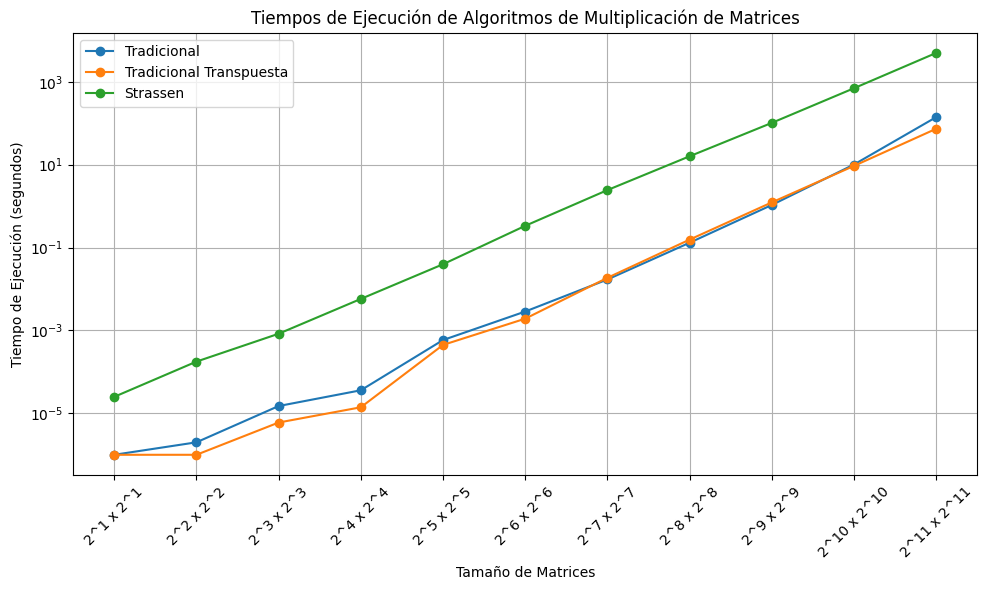

In [14]:
import matplotlib.pyplot as plt

# Tamaños de las matrices (en formato 2^n x 2^n)
tamaños = ['2^1 x 2^1', '2^2 x 2^2', '2^3 x 2^3', '2^4 x 2^4', '2^5 x 2^5', 
           '2^6 x 2^6', '2^7 x 2^7', '2^8 x 2^8', '2^9 x 2^9', '2^10 x 2^10', '2^11 x 2^11']

# Tiempos de ejecución en segundos
tradicional = [0.000001, 0.000002, 0.000015, 0.000036, 0.000586, 0.002857, 
               0.016943, 0.130483, 1.0629, 10.0565, 139.74]
transpuesta = [0.000001, 0.000001, 0.000006, 0.000014, 0.000447, 0.001921, 
               0.018591, 0.155076, 1.22676, 9.31647, 73.2585]
strassen = [0.000025, 0.000177, 0.000832, 0.005756, 0.039514, 0.33377, 
            2.42977, 15.8955, 101.587, 696.36, 4944.66]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(tamaños, tradicional, label='Tradicional', marker='o')
plt.plot(tamaños, transpuesta, label='Tradicional Transpuesta', marker='o')
plt.plot(tamaños, strassen, label='Strassen', marker='o')

# Personalizar la gráfica
plt.title('Tiempos de Ejecución de Algoritmos de Multiplicación de Matrices')
plt.xlabel('Tamaño de Matrices')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.yscale('log')  # Usamos escala logarítmica en el eje Y para ver mejor las diferencias
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
